# World Hapiness Report 2015-2023

This walkthrough is aimed to create data visualization project using python in the form of Jupyter Notebook. I sourced the dataset from https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors.

*0. Understand the problem*\
The given data is a World Happiness Report 2015-2023 dataset, which offers a comprehensive and up-to-date examination of happiness metrics and the factors influencing well-being on a global scale. This dataset is designed to provide valuable insights for policymakers, researchers, and individuals interested in understanding the dynamics of happiness and well-being worldwide. 

*1. Project Goals*\
These research questions will be used as guidance for exploration and analysis:
- What factors contribute to happiness? Identifying and analyzing the various factors such as economic, social, environmental, and psychological factors that influence an individual's overall happiness and well-being.
- How does economic development relate to happiness? Investigating the relationship between income levels, economic growth, and happiness, and understanding how economic factors impact overall well-being.
- How do social connections and relationships affect happiness? Exploring the importance of social relationships, community engagement, and interpersonal connections in determining an individual's level of happiness and life satisfaction.
- How does perceived corruption affect overall happiness and life satisfaction? Do countries with lower perceived corruption levels tend to rank higher in happiness? Investigating the correlation between individuals' perception of corruption within their society and their levels of happiness and life satisfaction.

*2. Data*\
This project uses `WHR_*.csv` from https://www.kaggle.com/datasets/sazidthe1/global-happiness-scores-and-factors which retrieved from https://worldhappiness.report/.\
These datasets comprise various key indicators related to happiness, which includes the following columns:
- `country`: The name of the country.
- `region`: The geographic region or continent.
- `happiness_score`: A measure reflecting overall happiness.
- `gdp_per_capita`: A measure of Gross Domestic Product per capita.
- `social_support`: A metric measuring social support.
- `healthy_life_expectancy`: A measure of years of healthy life expectancy.
- `freedom_to_make_life_choices`: A measure of freedom in life choices.
- `generosity`: A metric reflecting generosity.
- `perceptions_of_corruption`: A measure of perception of corruption within a country.

*3. Analysis*\
We apply some of statistical techniques and create visualization in order to: 
- Perform descriptive analysis to summarize and describe the data 
- Detect events (e.g relationship between factors) and anomalies that are happening
- Perform inferential analysis to draw conclusions and make predictions based on sample data.

*4. Evaluation*\
We wrap up the project and write conclusion(s) about overall process and key findings and takeaways.



### Import the relevant packages

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, chi2_contingency, ttest_ind

#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

### Load data

Loading CSV files and assign them to pandas dataframes.

In [5]:
# Combine the use of glob with pandas to organize this data better glob can open multiple files by using regex matching to get the filenames then concatenates all of those DataFrames together.

whr_files = glob.glob('WHR_*.csv')
df_list = []

# iterate csv data from 2015 to 2023
for file in whr_files:
  data = pd.read_csv(file)
  data['year'] = str(file.split('_')[1].split('.')[0]) # add a 'year' column
  df_list.append(data)

df = pd.concat(df_list, ignore_index=True)

print(f'number row of data: {len(df)}')

number row of data: 1367


In [6]:
# df.to_csv('whr_all.csv', index=False)

In [7]:
# List of loaded data
whr_files

['WHR_2015.csv',
 'WHR_2016.csv',
 'WHR_2017.csv',
 'WHR_2018.csv',
 'WHR_2019.csv',
 'WHR_2020.csv',
 'WHR_2021.csv',
 'WHR_2022.csv',
 'WHR_2023.csv']

In [8]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [9]:
# countries whose data only shows less than 5 times
x = df.groupby('country')['year'].count()
x[x < 5]

country
Angola                4
Belize                3
Congo                 1
Czechia               2
Djibouti              1
Eswatini              1
Maldives              2
Oman                  1
Puerto Rico           1
Somalia               4
Somaliland Region     1
Somaliland region     1
State of Palestine    1
Sudan                 4
Suriname              2
Swaziland             4
Turkiye               1
Name: year, dtype: int64

In [10]:
# basic statistical description
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


Notice that several columns have zeros, it is unclear if they are genuine zeros or missing values.
We have to identify these suspicious zeros which might potentially be missing values.

In [11]:
# Check for suspicious zeros in a specific column (e.g., 'gdp_per_capita')
suspicious_zeros = df[df['gdp_per_capita'] == 0]

# Explore suspicious zeros
suspicious_zeros

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
119,Congo (Kinshasa),Sub-Saharan Africa,4.5170,0.0,1.001200,0.098060,0.226050,0.248340,0.076250,2015
233,Somalia,Sub-Saharan Africa,5.4400,0.0,0.336130,0.114660,0.567780,0.272250,0.311800,2016
469,Central African Republic,Sub-Saharan Africa,2.6930,0.0,0.000000,0.018773,0.270842,0.280876,0.056565,2017
567,Somalia,Sub-Saharan Africa,4.9820,0.0,0.712000,0.115000,0.674000,0.238000,0.282000,2018
737,Somalia,Sub-Saharan Africa,4.6680,0.0,0.698000,0.268000,0.559000,0.243000,0.270000,2019
921,Burundi,Sub-Saharan Africa,3.7753,0.0,0.403575,0.295213,0.275399,0.187402,0.212187,2020
1074,Burundi,Sub-Saharan Africa,3.7750,0.0,0.062000,0.155000,0.298000,0.172000,0.212000,2021
1191,Venezuela,Latin America and Caribbean,4.9250,0.0,0.968000,0.578000,0.283000,0.225000,0.082000,2022
1317,Venezuela,Latin America and Caribbean,5.2110,0.0,1.257000,0.341000,0.369000,0.205000,0.084000,2023


According to article https://www.focus-economics.com/blog/the-poorest-countries-in-the-world/, most impoverished countries in the world in 2026. All of the top 5 are from Sub-Saharan Africa. This region continues to be held back by problems such as institutional weakness, corruption, poor infrastructure and a lack of human capital. However, even if they are the most impoverished countries, it's extremely unlikely a country has calculated GDP (Gross Domestic Product) per capita of 0 and it usually indicates a problem with the data or the calculation rather than a literal economic situation.

For this project, we use the information from similar records to impute zero values. In this case, we impute zero values based on the median of non-zero values within the same country groups.\
Note: this method will only be applied to `gdp_per_capita`, other variables will be left as it is.

In [12]:
# Impute zero values with the median of non-zero values within a country
df['gdp_per_capita'] = df.groupby('country')['gdp_per_capita'].transform(lambda x: x.replace(0, x[x != 0].median()))

# check data
zero_gdp = df.loc[df['country'] == 'Venezuela']
zero_gdp

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
22,Venezuela,Latin America and Caribbean,6.8100,1.044240,1.255960,0.720520,0.429080,0.058410,0.110690,2015
201,Venezuela,Latin America and Caribbean,6.0840,1.133670,1.033020,0.619040,0.198470,0.042500,0.083040,2016
396,Venezuela,Latin America and Caribbean,5.2500,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,2017
571,Venezuela,Latin America and Caribbean,4.8060,0.996000,1.469000,0.657000,0.133000,0.056000,0.052000,2018
733,Venezuela,Latin America and Caribbean,4.7070,0.960000,1.427000,0.805000,0.154000,0.064000,0.047000,2019
880,Venezuela,Latin America and Caribbean,5.0532,0.770239,1.348547,0.767026,0.271717,0.087179,0.063625,2020
1041,Venezuela,Latin America and Caribbean,4.8920,0.852000,0.897000,0.574000,0.284000,0.078000,0.072000,2021
1191,Venezuela,Latin America and Caribbean,4.9250,0.996000,0.968000,0.578000,0.283000,0.225000,0.082000,2022
1317,Venezuela,Latin America and Caribbean,5.2110,0.996000,1.257000,0.341000,0.369000,0.205000,0.084000,2023


We also going to explore variables with missing values.
`healthy_life_expectancy` and `perceptions_of_corruption` potentially have missing value (count: 1366)

In [13]:
# find rows with missing values
df[df.isna().any(axis=1)]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
489,United Arab Emirates,Middle East and North Africa,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018
1328,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


In [14]:
# Impute nan values with the median values within a country
df['healthy_life_expectancy'] = df['healthy_life_expectancy'].fillna(df.groupby('country')['healthy_life_expectancy'].transform('mean'))

In [15]:
df['perceptions_of_corruption'] = df['perceptions_of_corruption'].fillna(df.groupby('country')['perceptions_of_corruption'].transform('median'))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1367 non-null   float64
 9   year                          1367 non-null   object 
dtypes: float64(7), object(3)
memory usage: 106.9+ KB


In [16]:
df[df['country'].str.contains('Palestine')]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1328,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067,2023


Due to a lack of sufficient data for imputation regarding missing values (NaN) of `healthy_life_expectancy` in Palestine's dataset, we have opted to exclude this data from the analysis.

In [17]:
df = df.dropna()
print(f'Number of unique countries after delete: {df.country.nunique()}')

# number of unique region
print(f'Number of unique regions: {df.region.nunique()}')

Number of unique countries after delete: 170
Number of unique regions: 11


## What factors contribute to happiness?

Let's see the distribution of happiness score first.

In [18]:
# basic statistical description after imputation
round(df.describe(),3)

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,1366.000,1366.000,1366.000,1366.000,1366.000,1366.000,1366.000
mean,5.441,1.021,1.045,0.584,0.451,0.196,0.132
std,1.118,0.452,0.331,0.245,0.157,0.113,0.113
min,1.859,0.015,0.000,0.000,0.000,0.000,0.000
25%,4.598,0.704,0.832,0.402,0.356,0.115,0.057
50%,5.448,1.042,1.083,0.613,0.468,0.183,0.097
75%,6.257,1.339,1.299,0.778,0.569,0.253,0.167
max,7.842,2.209,1.644,1.141,0.772,0.838,0.587


In [19]:
round(df.happiness_score.mode(),3)

0    6.125
Name: happiness_score, dtype: float64

The average happiness score across 170 countries is 5.44 with highest is 7.84. Majority of the countries is scored 6.12.

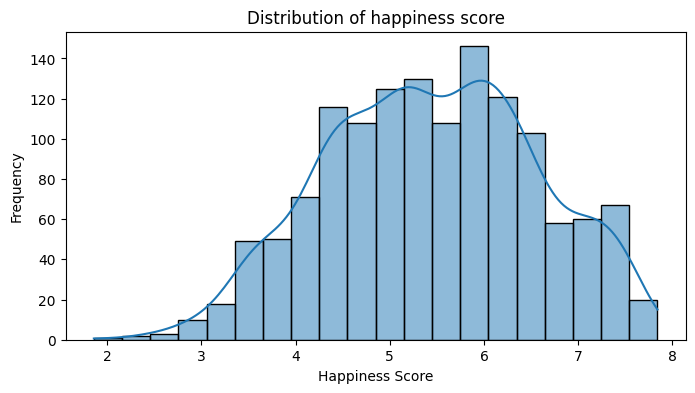

<Figure size 640x480 with 0 Axes>

In [20]:
# Univariate analysis and plots
# Histogram of happiness score
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='happiness_score', bins=20, kde=True)
plt.title('Distribution of happiness score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
plt.clf()

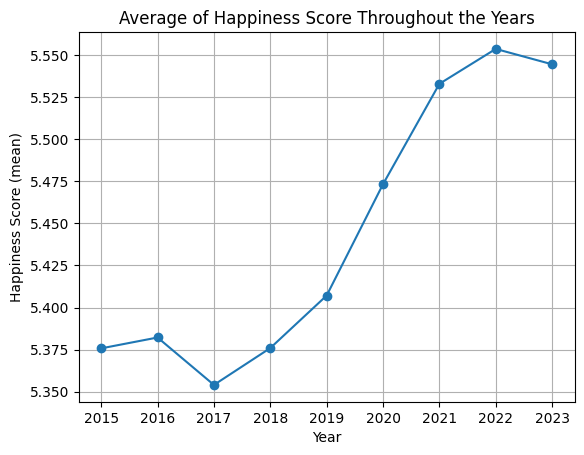

<Figure size 640x480 with 0 Axes>

In [21]:
# happiness score throughout the years
avg_hs = df.groupby('year')['happiness_score'].mean()
avg_hs

# Plot the line plot
avg_hs.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Happiness Score (mean)')
plt.title('Average of Happiness Score Throughout the Years')
plt.grid(True)
plt.show()
plt.clf()


Over the past eight years, we observe a consistent upward trend in happiness, with a minor dip noted in 2017. Remarkably, even during the onset of the pandemic from 2020 to 2022, there are no signs of a decline or leveling off in the happiness pattern.

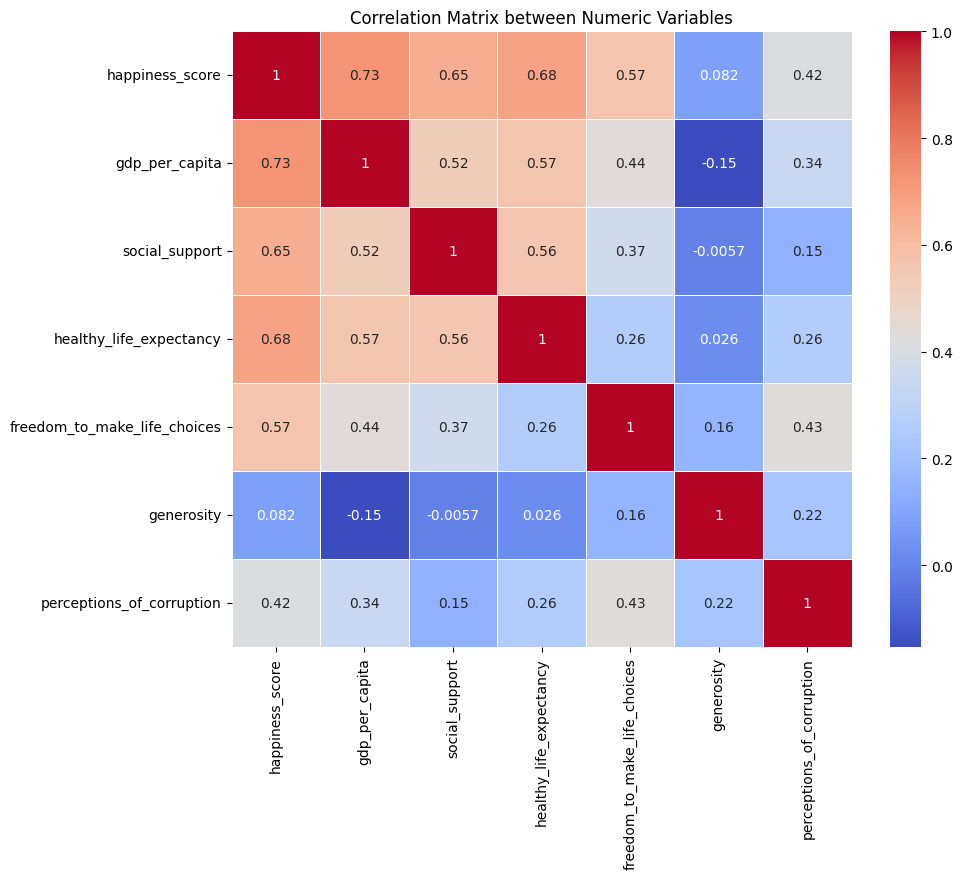

<Figure size 640x480 with 0 Axes>

In [22]:
# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Multivariate analysis
# Heatmap of correlation between all numeric variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Numeric Variables')
plt.show()
plt.clf()

- `gdp_per_capita`, `social_support`, `healthy_life_expectancy`, and `freedom_to_make_life_choices` indicate a strong positive correlation with `happiness_score`, while `perceptions_of_corruption` moderately correlates with percieved happiness. 
- On the other hand, `generosity` is not correlated or weakly correlated, meaning changes in this variable don't predict changes in happiness score. It is also has the weakest link with the other factors, while `gdp_per_capita` has the strongest link among them.
- How do social connections and relationships affect happiness? Social relationships and interpersonal connections are reflected by `social_support`, while community engagement is reflected by `generosity`. The graph indicates that an individual's level of happiness and life satisfaction are more influenced by social support, having someone personally to count on in times of trouble.

In [23]:
# the happiest and least happy countries
y = df.groupby(['country', 'region'])['happiness_score'].max().reset_index().sort_values(by='happiness_score', ascending=False)

y.head(10)


,country,region,happiness_score
49,Finland,Western Europe,7.8420
40,Denmark,Western Europe,7.6456
112,Norway,Western Europe,7.5940
146,Switzerland,Western Europe,7.5870
63,Iceland,Western Europe,7.5610
105,Netherlands,Western Europe,7.4880
69,Israel,Middle East and North Africa,7.4730
25,Canada,North America and ANZ,7.4270
87,Luxembourg,Western Europe,7.4040
145,Sweden,Western Europe,7.3950


In [24]:
y.tail(10)

,country,region,happiness_score
167,Yemen,Middle East and North Africa,4.1970
152,Togo,Sub-Saharan Africa,4.1872
3,Angola,Sub-Saharan Africa,4.0330
139,South Sudan,Sub-Saharan Africa,3.8320
0,Afghanistan,South Asia,3.7940
150,Tanzania,Sub-Saharan Africa,3.7810
22,Burundi,Sub-Saharan Africa,3.7753
26,Central African Republic,Sub-Saharan Africa,3.6780
126,Rwanda,Sub-Saharan Africa,3.5150
147,Syria,Middle East and North Africa,3.4620


Nordic countries have higher levels of happiness, while sub-saharan africa countries are among the least happy.

## How does economic development relate to happiness?

We would like to further asses the correlation between GDP and happiness, and we want to find out how strong this relationship is.\
In addition we would like to know if happiness score is statistically different between wealthy countries and the ones with a lower GDP.

We perform normality test to check happiness score and GDP using Kolmogorov-Smirnov Test.

In [25]:
from scipy.stats import kstest

alpha = 0.05
# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(df.happiness_score, 'norm')

# Check the p-value
if p_value > alpha:
    print("Happiness score looks normally distributed (fail to reject H0)")
else:
    print("Happiness score does not look normally distributed (reject H0)")

Happiness score does not look normally distributed (reject H0)


In [26]:
alpha = 0.05
# Perform Kolmogorov-Smirnov test
statistic, p_value = kstest(df.gdp_per_capita, 'norm')

# Check the p-value
if p_value > alpha:
    print("GDP looks normally distributed (fail to reject H0)")
else:
    print("GDP score does not look normally distributed (reject H0)")

GDP score does not look normally distributed (reject H0)


Since GDP and life expectancy are non-normal, the Kendall correlation coefficient (kendalltau) is used for measuring correlation.
Normality is tested with normaltest from scipy.stats.

In [27]:
from scipy.stats import kendalltau

# Calculate Kendall's rank correlation
correlation_coefficient, p_value = kendalltau(df.happiness_score, df.gdp_per_capita)

print(f"Kendall's correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results based on the p-value
alpha = 0.05
if p_value > alpha:
    print("No significant correlation")
else:
    print("Significant correlation")

Kendall's correlation coefficient: 0.5441592507515733
P-value: 2.3981680340032483e-199
Significant correlation


This implies that we have identified a moderate to strong correlation between GDP and the happiness score. 
the following scatter plot agree with this conclusion.

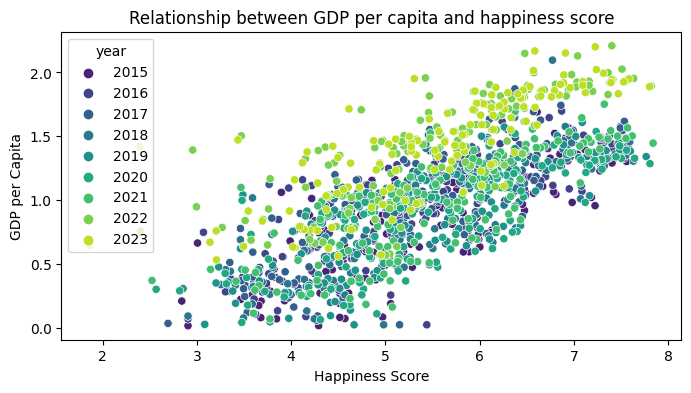

In [28]:
# Bivariate plot
# Scatter plot between GDP per capita and happiness score
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df,  y='gdp_per_capita', x='happiness_score', hue='year', palette='viridis')
plt.title('Relationship between GDP per capita and happiness score')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.show()

Higher GDP seems influence better happiness score, although this is not the only influencing factor.

Now we investigate if happiness score is statistically different between wealthy countries and the ones with a lower GDP.

Is there a statistical evidence that nations with higher GDPs have an higher happiness score?
This alternative hypothesis is tested by means of a 2 sample t-test:\
NULL HYPOTHESIS: nations with an higher GDP do not have a greater happiness score\
ALTERNATIVE HYPOTHESIS: nations with an higher GDP have a greater happiness score

To categorize GDP to high, middle, and low ranges, we need to define the criteria or thresholds that constitutes 'high', 'middle', and 'low' GDP. Let's use quartiles to define these ranges:
- High GDP Range: GDP values in the top 25% (i.e., the highest quartile).
- Middle GDP Range (Upper): GDP values between the 25th percentile and the 50th percentile (i.e., the interquartile range).
- Middle GDP Range (Lower): GDP values between the 50th percentile and the 75th percentile (i.e., the interquartile range).
- Low GDP Range: GDP values in the bottom 25% (i.e., the lowest quartile).

In [29]:
# Define the quartiles
q1 = np.percentile(df.gdp_per_capita, 25)
q2 = np.percentile(df.gdp_per_capita, 50)
q3 = np.percentile(df.gdp_per_capita, 75)

# define the ranges
value_ranges = [
    (df.gdp_per_capita < q1),
    (df.gdp_per_capita >= q1) & (df.gdp_per_capita <= q2), 
    (df.gdp_per_capita >= q2) & (df.gdp_per_capita <= q3),
    (df.gdp_per_capita > q3)
]

# define categories
categories = ['Low GDP', 'Lower Mid GDP', 'Upper Mid GDP', 'High GDP']

df['gdp_cat'] = np.select(value_ranges, categories)

df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,gdp_cat
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High GDP
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Upper Mid GDP
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Upper Mid GDP
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,High GDP
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,Upper Mid GDP


We want to explore how economic development relates to other factors

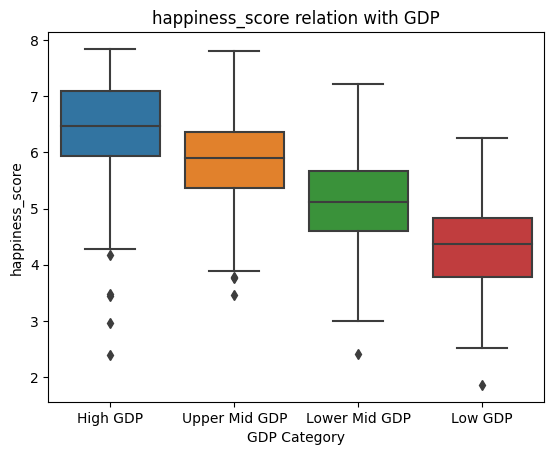

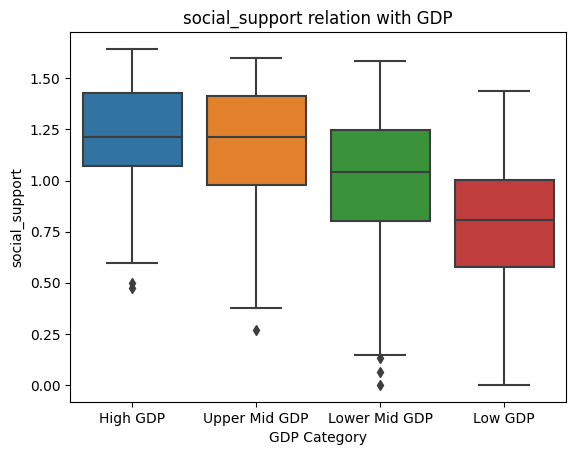

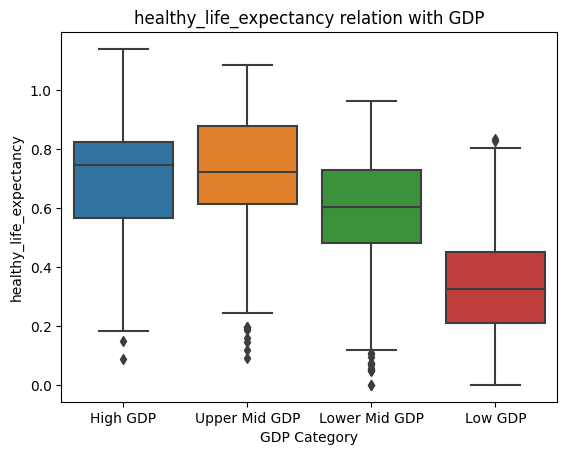

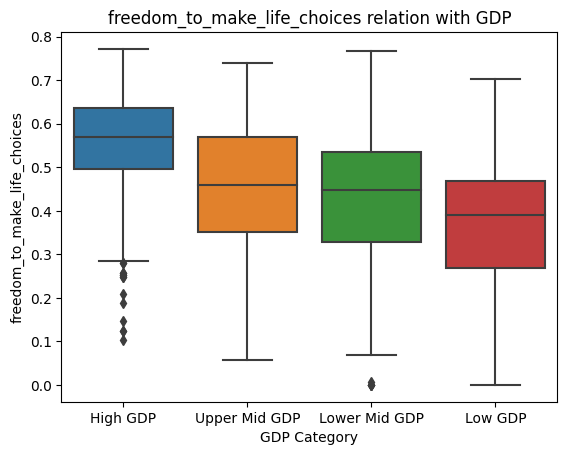

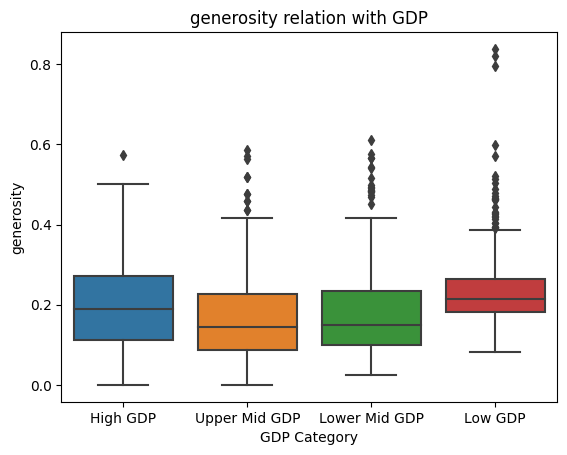

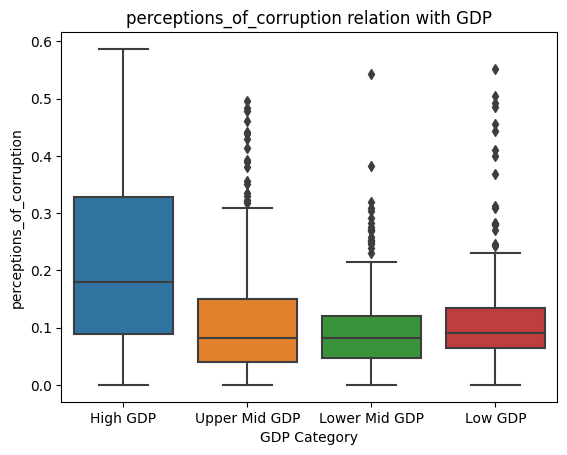

<Figure size 640x480 with 0 Axes>

In [30]:
## boxplot
for var in ['happiness_score', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']:
    sns.boxplot(data=df, x='gdp_cat', y=var)
    plt.title("{} relation with GDP".format(var))
    plt.xlabel('GDP Category')
    plt.ylabel(var)
    plt.show()
    plt.clf()


Notable patterns in central tendency across GDP per capita category are:
- Increasing median trend across Low to High GDP on `happiness_score`, `social_support`, `healthy_life_expectancy`, and `freedom_to_make_life_choices`. This trend suggests that there may be a positive relationship between the increase of the national economic output (GDP) that being distributed among its population to social support, healthy life, and freedom percieved by its people. All of which correlates with happiness score.
- Upper Mid and High GDP per capita gets about similar median score of `healthy_life_expectancy` and `social_support`. In countries with a GDP ranging from upper-middle to high, people tend to have someone, relatives or friends, to help whenever they need them. This might results in increase of well-being and longer life expectancy.
- Citizens of low GDP tend to display greater `generosity` and more outliers compared to their counterparts in higher-income nations. This implies that people in this group are drawn to behaviours which benefit other people, willingness to help others, and contribute to social causes.
- People in High GDP nations have higher `perceptions_of_corruption`.


In [31]:
# two samples t-test comparing gdp with other factors
factors = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
alpha = 0.05

for var1 in factors:
    for var2 in factors:
        if var1 != var2:
            t_stat, p_val = ttest_ind(df[var1], df[var2])
            print(f'Two-sample t-test between {var1} and {var2}:')
            print(f'T-statistic: {t_stat}')
            print(f'P-value: {p_val}')
            if p_val < alpha:
                print('Statistically significant difference detected.')
            else:
                print('No statistically significant difference detected.')
            print('-' * 40)


Two-sample t-test between gdp_per_capita and social_support:
T-statistic: -1.591556544457377
P-value: 0.11160015771340599
No statistically significant difference detected.
----------------------------------------
Two-sample t-test between gdp_per_capita and healthy_life_expectancy:
T-statistic: 31.428055716171073
P-value: 2.5416830847594238e-185
Statistically significant difference detected.
----------------------------------------
Two-sample t-test between gdp_per_capita and freedom_to_make_life_choices:
T-statistic: 44.08107124836863
P-value: 5.247e-321
Statistically significant difference detected.
----------------------------------------
Two-sample t-test between gdp_per_capita and generosity:
T-statistic: 65.4547468447396
P-value: 0.0
Statistically significant difference detected.
----------------------------------------
Two-sample t-test between gdp_per_capita and perceptions_of_corruption:
T-statistic: 70.55624079896296
P-value: 0.0
Statistically significant difference detected.

The t-test results comparing GDP factor with five other factors shows that there is insufficient statistical evidence that GDP and social support factors are significantly different. This implies GDP does not appear to influence the social support score significantly, but might have an influence on life expectancy, freedom, generosity, and perception of corruption score.

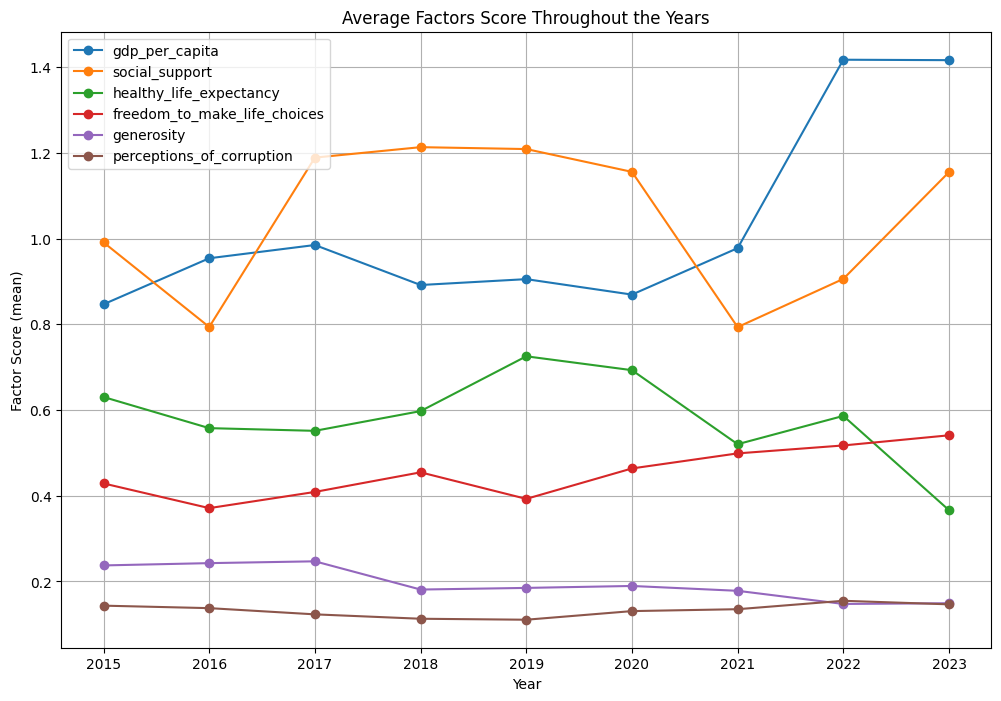

<Figure size 640x480 with 0 Axes>

In [32]:
# average of happiness factors throughout the years  
factors = ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
avg_factors = df.groupby('year')[factors].mean()

# Plot the line plot
avg_factors.plot(kind='line', marker='o')
# avg_hs.plot(kind='line', marker='o')
plt.gcf().set_size_inches(12, 8)
plt.xlabel('Year')
plt.ylabel('Factor Score (mean)')
plt.title('Average Factors Score Throughout the Years')
plt.grid(True)
plt.show()
plt.clf()

- The trend in `gdp_per_capita` follow a similar increasing pattern observed in the happiness score.
- Also there is a improvement in the perception of `freedom_to_make_life_choices` between 2015 and 2023.
- `social_support`, `healthy_life_expectancy`, and `generosity` exhibit a sharp decline between 2020 and 2021 when the pandemic hits. Subsequently, there was a modest recovery in 2022 for `social_support` and `healthy_life_expectancy`, but not for `generosity`.
- `healthy_life_expectancy` and `generosity` stand as the factors showing downtrend trajectory, especially between 2019 and 2023.

## Conclusion

We performed exploratory data analysis on the "World Happiness Report" dataset from 2015 to 2023 to get a better picture of its variables and characteristics. We notice that the dataset may not be representative of the population. Some example of some potential bias here is not every country has a survey every year, therefore the confidence intervals are naturally tighter for countries with larger samples. Other example is the researchers states some of 2022 data are based on 2020 and/or 2021 surveys. It is important to consider these potential sources of bias when using the dataset for research and other applications.

- The general level of happiness demonstrate a consistent upward trend, and even despite the pandemic wave between 2020-2022.
- The gross domestic product is related to the overall wealth generated by the economy of a country and significantly influence with happiness of its population. 
- Other factors which contribute to happiness are social support, healthy life expectancy, freedom to make life choices, and perceptions of corruption, also generosity to a certain extent.
- There may be a positive relationship between higher GDP to social support, healthy life expectancy, and freedom percieved by its people.